In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import seaborn
%matplotlib inline

In [24]:
mean1 = [1,5]
cov1 = [[1, 0], [0, 1]]

mean2 = [6,-2]
cov2 = [[1, 0], [0, 1]]

mean3 = [-3,-3]
cov3 = [[1, 0], [0, 1]]

size = 1200

x1 = np.random.multivariate_normal(mean1 , cov1, size//3)
y1 = np.repeat(1, len(x1), axis=0)
x2 = np.random.multivariate_normal(mean2 , cov2, size//3)
y2 = np.repeat(2, len(x1), axis=0)
x3 = np.random.multivariate_normal(mean3 , cov3, size//3)
y3 = np.repeat(3, len(x1), axis=0)

x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))

dat = np.zeros((size, 3))
dat[:,0] = y
dat[:,1:] = x

data = pd.DataFrame(dat, columns=['label', 'x1', 'x2'])

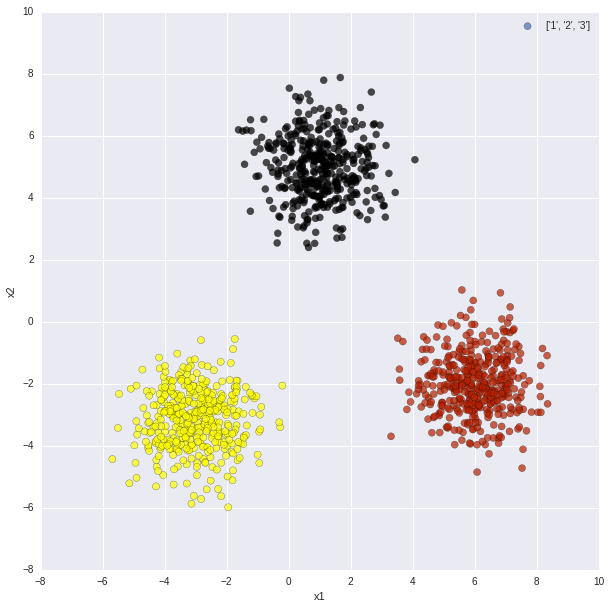

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(data.x1, data.x2, c=data.label, 
            cmap=plt.cm.gnuplot, s=50, alpha=0.7,
            label=['1','2','3'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [26]:
X = data[['x1','x2']].values 

In [35]:
def distance(x, y):
    """
    calcuates the euclidian distance between two points
    parameters:
    input:
        x: data point
        y: data point
    output:
        euclidiane distance between input data points
    """
    return np.sqrt(np.sum(np.square(y - x)))

def kcenter(x, k, debug=False):
    """
    k-center greedy clustring algorithm based on gonzales 1985

    parameters:
    input:
        x: input data (numpy array)
        k: number of clusters
    output:
        c: cluster centers
        r: cluster radius
    """
    
    dim = np.shape(x)   #input dimension
    d = np.repeat(np.inf,  #initilize distance vector
                  dim[0]).reshape((dim[0],1))
    c = (k+1) * [np.nan] #initilize cluster set
    r = np.zeros((k, 1))  #initialize cluster radius
    
    c[0] = x[np.random.randint(0, dim[0])] #randomly choose the first cluster
    
    for j in range(k):
        for i in range(dim[0]):
            d[i] = min(d[i], distance(x[i], c[j]))
            if r[j] < d[i]:
                r[j] = d[i]
                if debug:
                    print("j=",j," set",r[j], "to", d[i])
                c[j + 1]  = x[i]
    
    c = c[:k]
    label = []
    for point in x:
        p_distance = []
        for i,center in enumerate(c):
            p_distance.append(distance(center, point))
        label.append(p_distance.index(min(p_distance)))
        
        
                
    return c, r, label

In [36]:
c,r,label = kcenter(X, 3)

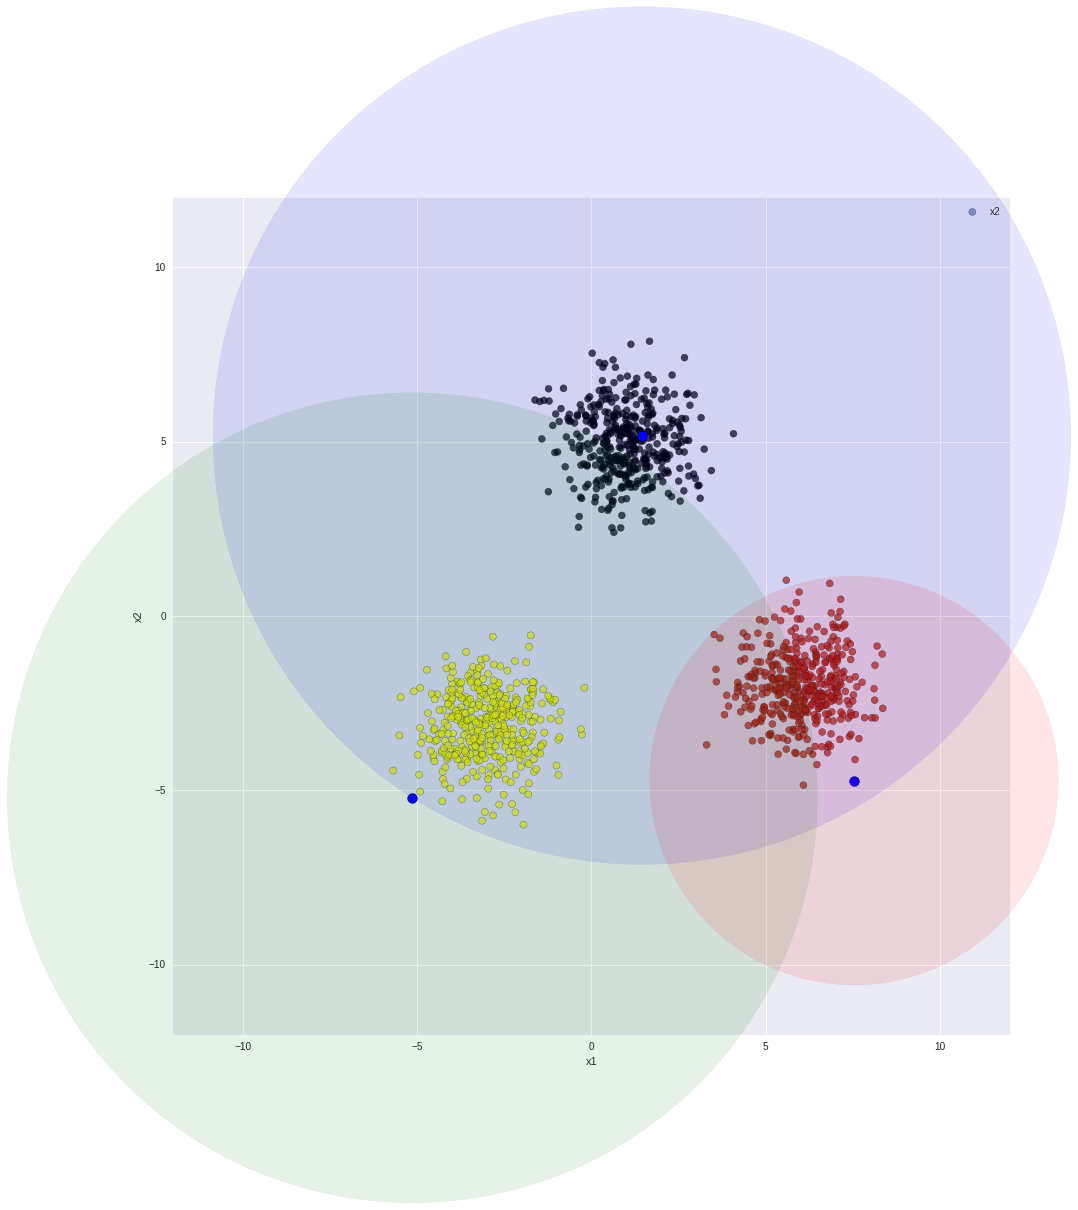

In [29]:
ax = plt.figure(figsize=(15,15))
plt.scatter(data.x1, data.x2, c=data.label, 
            cmap=plt.cm.gnuplot, s=50, alpha=0.7)


plt.scatter(c[0][0],c[0][1], s= 100)
plt.scatter(c[1][0],c[1][1], s= 100)
plt.scatter(c[2][0],c[2][1], s= 100)
plt.xlim((-12,12))
plt.ylim((-12,12))


circle1 = plt.Circle((c[0][0],c[0][1]),
                     r[0], color='b',
                     fill=True, clip_on=False, alpha=0.1)
ax.gca().add_artist(circle1)

circle2 = plt.Circle((c[1][0],c[1][1]),
                     r[1], color='g',
                    fill=True, clip_on=False, alpha=0.1)
ax.gca().add_artist(circle2)

circle3 = plt.Circle((c[2][0],c[2][1]),
                     r[2], color='r',
                    fill=True, clip_on=False, alpha=0.1)
ax.gca().add_artist(circle3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

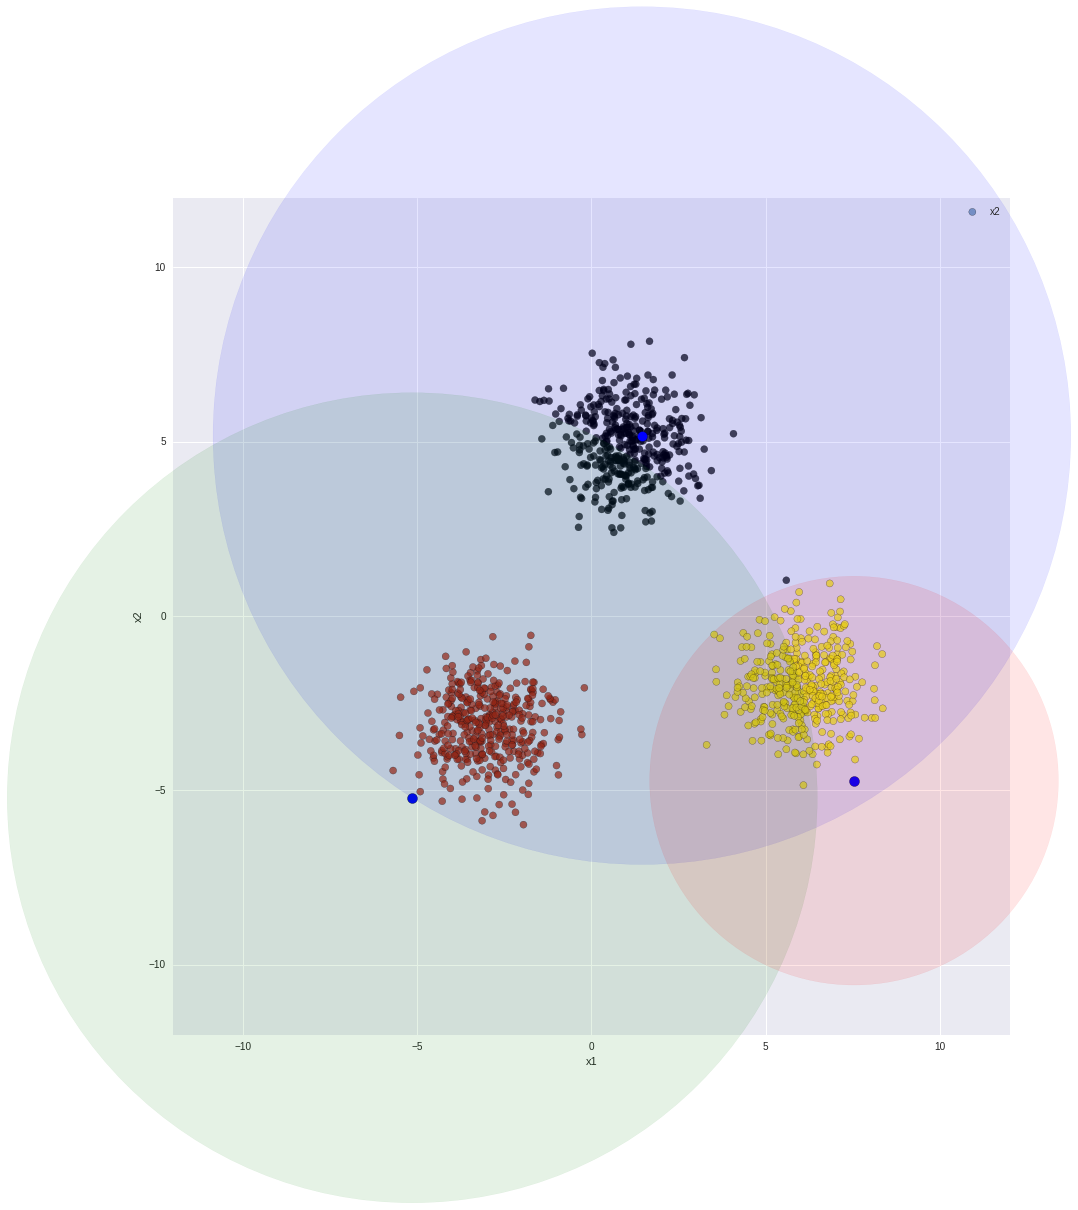

In [33]:
ax = plt.figure(figsize=(15,15))
plt.scatter(data.x1, data.x2, c=label, 
            cmap=plt.cm.gnuplot, s=50, alpha=0.7)


plt.scatter(c[0][0],c[0][1], s= 100)
plt.scatter(c[1][0],c[1][1], s= 100)
plt.scatter(c[2][0],c[2][1], s= 100)
plt.xlim((-12,12))
plt.ylim((-12,12))
circle1 = plt.Circle((c[0][0],c[0][1]),
                     r[0], color='b',
                     fill=True, clip_on=False, alpha=0.1)
ax.gca().add_artist(circle1)

circle2 = plt.Circle((c[1][0],c[1][1]),
                     r[1], color='g',
                    fill=True, clip_on=False, alpha=0.1)
ax.gca().add_artist(circle2)

circle3 = plt.Circle((c[2][0],c[2][1]),
                     r[2], color='r',
                    fill=True, clip_on=False, alpha=0.1)
ax.gca().add_artist(circle3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()